In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv(r'C:\Projects\Amazon Best Selling Books\bestsellers with categories.csv')

In [3]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
df.shape

(550, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [12]:
df.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [16]:
#Checking Null Values 
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [17]:
#Checking Duplicates
df.duplicated().sum()

np.int64(0)

In [19]:
df.describe(include='all')

,Name,Author,User Rating,Reviews,Price,Year,Genre
count,550,550,550.000000,550.000000,550.000000,550.000000,550
unique,351,248,NaN,NaN,NaN,NaN,2
top,Publication Manual of the American Psychologic...,Jeff Kinney,NaN,NaN,NaN,NaN,Non Fiction
freq,10,12,NaN,NaN,NaN,NaN,310
mean,NaN,NaN,4.618364,11953.281818,13.100000,2014.000000,NaN
std,NaN,NaN,0.226980,11731.132017,10.842262,3.165156,NaN
min,NaN,NaN,3.300000,37.000000,0.000000,2009.000000,NaN
25%,NaN,NaN,4.500000,4058.000000,7.000000,2011.000000,NaN
50%,NaN,NaN,4.700000,8580.000000,11.000000,2014.000000,NaN
75%,NaN,NaN,4.800000,17253.250000,16.000000,2017.000000,NaN


In [24]:
#CLEANING AND TRANSFORMING DATA
import numpy as np

In [25]:
df.columns = df.columns.str.strip().str.replace(' ','_').str.lower()

In [26]:
df.columns

Index(['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre'], dtype='object')

In [ ]:
#CONVERTING TYPES

In [30]:
df['user_rating'] = pd.to_numeric(df['user_rating'])

In [31]:
df['reviews'] = pd.to_numeric(df['reviews'])

In [32]:
df['price'] = pd.to_numeric(df['price'])

In [33]:
df['year'] = pd.to_numeric(df['year'])

In [43]:
df.dtypes

name            object
author          object
user_rating    float64
reviews          int64
price            int64
year             int64
genre           object
dtype: object

In [44]:
#TRIMMING WHITESPACES FROM TEXT FIELDS

In [45]:
for c in ['name', 'author','genre']:
    if c in df.columns:
        df[c]=df[c].astype(str).str.strip()

In [46]:
df.columns

Index(['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre'], dtype='object')

In [47]:
#EXPLORATORY DATA ANLYSIS (EDA)

In [55]:
df.columns.value_counts().head()

name           1
author         1
user_rating    1
reviews        1
price          1
Name: count, dtype: int64

In [56]:
df[['user_rating','reviews','price']].describe()

,user_rating,reviews,price
count,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000
std,0.226980,11731.132017,10.842262
min,3.300000,37.000000,0.000000
25%,4.500000,4058.000000,7.000000
50%,4.700000,8580.000000,11.000000
75%,4.800000,17253.250000,16.000000
max,4.900000,87841.000000,105.000000


In [57]:
#TOP AUTHORS
df['author'].value_counts().head(15)

author
Jeff Kinney                           12
Gary Chapman                          11
Rick Riordan                          11
Suzanne Collins                       11
American Psychological Association    10
Dr. Seuss                              9
Gallup                                 9
Rob Elliott                            8
Stephen R. Covey                       7
Stephenie Meyer                        7
Dav Pilkey                             7
Bill O'Reilly                          7
Eric Carle                             7
The College Board                      6
E L James                              6
Name: count, dtype: int64

In [58]:
#AVERAGE RATING BY GENRE

In [59]:
df.groupby('genre')['user_rating'].mean().sort_values(ascending = False)

genre
Fiction        4.648333
Non Fiction    4.595161
Name: user_rating, dtype: float64

In [61]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Price Distribution')

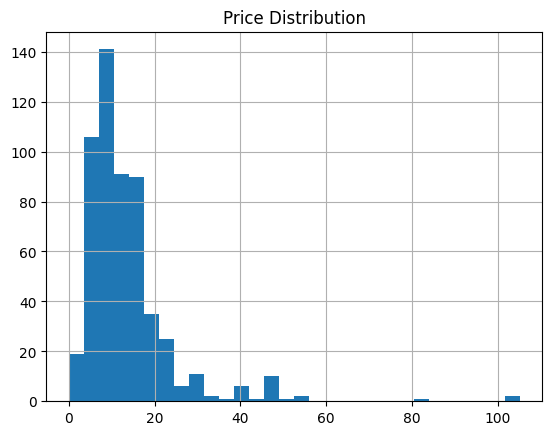

In [63]:
df['price'].dropna().hist(bins = 30)
plt.title('Price Distribution')

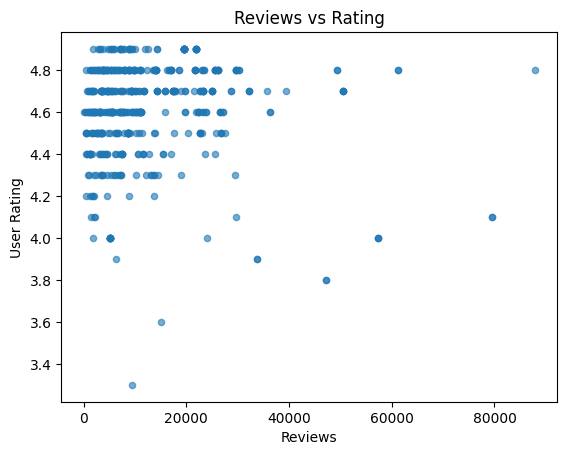

In [73]:
plt.scatter(df['reviews'], df['user_rating'], s=20, alpha=0.6)
plt.xlabel('Reviews')
plt.ylabel('User Rating')
plt.title('Reviews vs Rating')
plt.show()

<Axes: xlabel='year'>

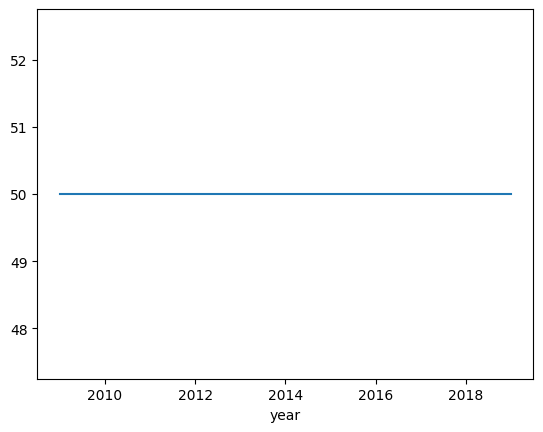

In [74]:
#HOW MANY BEST SELLERS PER YEAR
df['year'].value_counts().sort_index().plot(kind='line')

In [83]:
df[['price','user_rating']].corr()

,price,user_rating
price,1.000000,-0.133086
user_rating,-0.133086,1.000000


In [88]:
#AUTHORS APPEARING IN MULTIPLE YEARS
df.groupby('author')['year'].nunique().sort_values(ascending=False).head(20)

author
Gary Chapman                          11
Jeff Kinney                           11
American Psychological Association    10
Gallup                                 9
Dr. Seuss                              8
Stephen R. Covey                       7
Eric Carle                             7
Don Miguel Ruiz                        6
Bill O'Reilly                          6
Sarah Young                            6
Rick Riordan                           6
The College Board                      6
Rob Elliott                            5
Dale Carnegie                          5
Giles Andreae                          5
John Grisham                           5
Roger Priddy                           5
R. J. Palacio                          5
Patrick Lencioni                       5
Harper Lee                             5
Name: year, dtype: int64

In [89]:
df.to_csv('Amazon_Books_Clean_&_transform_data.csv')